## 引入数据包

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

## 读取刚刚清洗过的表格并展示
在之前清洗中得到了合并的表格，并且这个合并表格删除了对于建模没有作用的大部分数据列，目前留下的表格如下，，并且这个表格已经全部转化成数值化。


In [29]:
clean_data=pd.read_csv('cleaned_airbnb.csv')
clean_data=clean_data.set_index('Unnamed: 0')
clean_data.sample(10)

,id,room_type,price,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,
1522,21504120,0,43,1.00,1,1,1,4,1.0,1,2.0,4,37,0.00,10.0,2,20.0,0.96,0,0,1,1,4.717195,0.5,0.983333
2509,28948305,0,79,1.00,0,32,1,2,1.0,0,1.0,4,21,0.00,20.0,1,10.0,0.92,0,0,31,0,0.670247,1.0,0.950000
4295,38596067,2,20,1.00,0,7,12,2,1.5,1,0.0,4,36,NaN,NaN,1,0.0,0.95,0,0,1,0,10.122822,0.5,0.983333
1332,19915802,2,35,1.00,0,1,19,2,1.0,1,1.0,4,8,NaN,NaN,1,0.0,1.00,0,0,0,0,11.262615,0.5,0.966667
4338,38714017,0,85,1.00,0,39,12,4,2.0,2,2.0,4,25,0.00,60.0,1,0.0,0.00,0,0,39,0,3.041586,0.5,0.000000
205,5584153,0,65,1.00,1,2,1,3,1.0,1,3.0,4,48,NaN,NaN,1,10.0,0.99,0,0,2,1,17.887273,0.5,1.000000
4302,38615867,0,90,0.96,0,41,12,2,1.0,1,1.0,4,17,150.00,30.0,2,10.0,0.80,0,0,28,0,3.022817,0.5,0.916667
2040,25388525,0,150,1.00,1,2,1,5,1.5,2,3.0,4,27,NaN,56.0,1,0.0,0.97,0,0,2,1,1.320448,0.5,1.000000
1499,21382496,2,36,1.00,1,4,19,3,1.5,1,2.0,4,20,NaN,5.0,1,13.0,0.98,0,0,0,0,10.093115,0.5,1.000000


但是发现security_deposit  cleaning_fee     这两列有空值，为了不影响后续计算，将空值填充为0

In [30]:
clean_data=clean_data.fillna(0)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 4847 to 0
Data columns (total 25 columns):
id                                             4848 non-null int64
room_type                                      4848 non-null int64
price                                          4848 non-null int64
host_response_rate                             4848 non-null float64
host_is_superhost                              4848 non-null int64
host_listings_count                            4848 non-null int64
property_type                                  4848 non-null int64
accommodates                                   4848 non-null int64
bathrooms                                      4848 non-null float64
bedrooms                                       4848 non-null int64
beds                                           4848 non-null float64
bed_type                                       4848 non-null int64
amenities                                      4848 non-null int64
security_deposit

计算模型，id因为只是注册ID而已对于价格没有影响，就像身份证号码并不能决定一个人的成败一样。既然id列没有用，，为了防止后续误操作，删除id并创建cd表

In [31]:
cd=clean_data.drop(['id'],axis=1)
cd.sample(10)

,room_type,price,host_response_rate,host_is_superhost,host_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,is_popular,distance,host_verifieds,review_scores_mean
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,
1966,2,30,0.96,0,4,1,2,1.0,1,1.0,4,20,0,0.0,1,0.0,0.98,0,0,0,1,1.674762,0.5,1.000000
4034,2,40,1.00,0,1,19,2,1.0,1,1.0,4,12,0,0.0,1,0.0,0.90,0,0,0,0,4.815784,0.5,0.966667
2731,2,30,1.00,1,2,27,2,1.5,1,2.0,4,12,0.00,10.0,1,15.0,0.99,0,0,0,0,4.684598,0.5,1.000000
4630,0,25,1.00,0,1,19,1,1.0,1,1.0,4,13,0,0.0,1,0.0,0.00,0,0,1,0,10.710871,0.5,0.000000
35,2,66,0.00,0,1,19,1,1.0,1,1.0,4,6,100.00,15.0,1,10.0,0.00,0,0,0,0,5.323429,0.5,0.000000
2862,0,135,0.00,0,1,19,1,1.0,1,1.0,4,11,0,0.0,1,0.0,0.00,0,0,1,0,0.351057,0.5,0.000000
1116,2,27,1.00,0,8,19,1,0.5,1,1.0,4,18,0.00,0.0,1,10.0,0.91,0,0,0,1,1.053755,0.5,0.950000
974,2,100,0.00,0,2,19,3,1.0,1,1.0,4,14,0,0.0,1,0.0,0.80,0,0,1,0,4.372664,0.5,0.900000
2060,2,12,0.00,0,1,19,1,1.0,1,1.0,4,19,200.00,10.0,1,10.0,0.00,0,0,0,0,2.782747,0.5,0.000000


## 先测试价格的模型

把所有的列都作为特征，把价格作为标签，用机器学习的方法来预测价格

在制作的时候发现价格列有的数据很贵，于是有的数据有千分符号影响 需要去掉

In [32]:
cd = cd.applymap(lambda x: str(x).replace(',', ''))

In [33]:
colist=[column for column in cd]
colist

['room_type',
 'price',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'review_scores_rating',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_entire_homes',
 'is_popular',
 'distance',
 'host_verifieds',
 'review_scores_mean']

###  去掉价格离谱的点

机器学习中因为数据会受到极大值影响而使得预测结果不准确， 什么是价格离群点呢？离群点又称为异常值，可能是单位引起，可能是特征过于奇特所以价格离谱，也可能是填报信息人员理解错单位， 总之，超出3倍标准差的点是上限点，低于3倍标准差的点是下限



如果我这么解释不够清晰直白明朗，请看[这个链接](https://blog.csdn.net/qq_41080850/article/details/86695846)

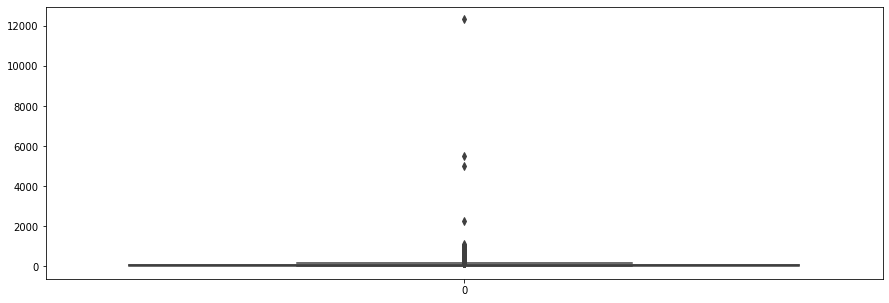

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

fig, ax =plt.subplots(1,1)  
fig.set_size_inches(15,5)   # 设置画布大小
sns.boxplot(data=cd['price'])


price有极大值影响，应予以删除, 且价格肯定不能为负数

In [35]:
cd['price']=cd['price'].astype('float64')

In [36]:
mean, std = cd['price'].mean() , cd['price'].std()

# 得到上下限
lower , upper =mean -3*std , mean+3*std

print('均值',mean)
print('标准差',std)
print('下限',lower)
print('上限',upper)


均值 81.64335808580859
标准差 226.53714544911625
下限 -597.9680782615402
上限 761.2547944331574


小于上限并大于零的筛选

In [37]:
cd=cd[cd['price']<upper]
cd=cd[cd['price']>0]
cd.describe()

,price
count,4818.000000
mean,72.417393
std,68.493371
min,8.000000
25%,30.000000
50%,52.000000
75%,89.000000
max,699.000000


但是呢，从这个describe可以看到，均值72，50%分为52，75%分为89元， 但是最大值竟然依然有699元 这直觉上依然严重偏离。所以还需要继续作图观察一下

In [38]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 4847 to 0
Data columns (total 24 columns):
room_type                                      4818 non-null object
price                                          4818 non-null float64
host_response_rate                             4818 non-null object
host_is_superhost                              4818 non-null object
host_listings_count                            4818 non-null object
property_type                                  4818 non-null object
accommodates                                   4818 non-null object
bathrooms                                      4818 non-null object
bedrooms                                       4818 non-null object
beds                                           4818 non-null object
bed_type                                       4818 non-null object
amenities                                      4818 non-null object
security_deposit                               4818 non-null object
cleaning

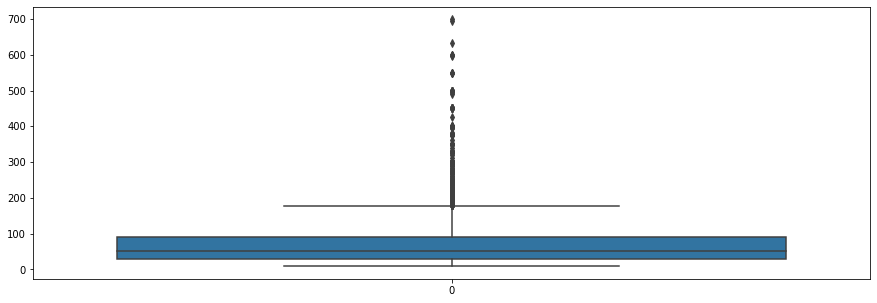

In [39]:
fig, ax =plt.subplots(1,1)  
fig.set_size_inches(15,5)   # 设置画布大小
sns.boxplot(data=cd['price'])

通过数据观察，还是有很多大的利群点，而且价格在300以上的单天价格确实有些贵，为了模型不受极大值影响，再看一次上下限；可以看到超过这次上限277元的有114个数据，予以删除


In [40]:
mean, std = cd['price'].mean() , cd['price'].std()

# 得到上下限
lower , upper =mean -3*std , mean+3*std

print('均值',mean)
print('标准差',std)
print('下限',lower)
print('上限',upper)

均值 72.41739310917393
标准差 68.49337074255638
下限 -133.0627191184952
上限 277.8975053368431


In [41]:
len(cd[cd['price']>277])

114

In [42]:
cd=cd[cd['price']<upper]
cd=cd[cd['price']>0]
cd.describe()

,price
count,4704.000000
mean,64.762755
std,45.699425
min,8.000000
25%,30.000000
50%,50.000000
75%,85.000000
max,275.000000


将至目前删除了价格极大值的数据存为for——model的csv文件，之后的模型计算将用这个表格

In [43]:
cd.to_csv('for_model.csv')


# 机器学习开始
## 价格预测

首先导入必要的工具包

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error #平方绝对误差
import sklearn.metrics  #评价指标
import matplotlib.pyplot as plt

### 多元线性回归

因为价格可能是连续的，于是抱着试一试线性回归能否预测价格的想法，将除了价格之外的数据作为特征，将价格作为标注

结论先行：从结果来看，选取的这些数据大概准确，全部回归测算图和局部放大图可以看到，多元回归模型起作用

In [45]:
# 使用pandas读入数据
data = pd.read_csv('for_model.csv')
data=data.set_index('Unnamed: 0')
colist=[column for column in data]
colist

['room_type',
 'price',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'review_scores_rating',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_entire_homes',
 'is_popular',
 'distance',
 'host_verifieds',
 'review_scores_mean']

linereg的theta =  [-1.65958227e+01 -1.29741430e+00  1.08604679e+00  1.93511592e-02
  1.53506252e-01  5.57439436e+00  4.32398585e+00  2.71989735e-01
  1.36107891e+00  1.63317749e+00 -1.74804611e-01  3.28852196e-03
 -3.97343739e-02  3.29588286e+00  8.01280140e-02  2.40226063e+01
  1.17840181e+01 -1.24664076e+01 -8.08468673e-02 -7.60296026e-01
  1.62264777e+00 -3.41748079e+01]

linreg的截距项 =  57.36671038802716


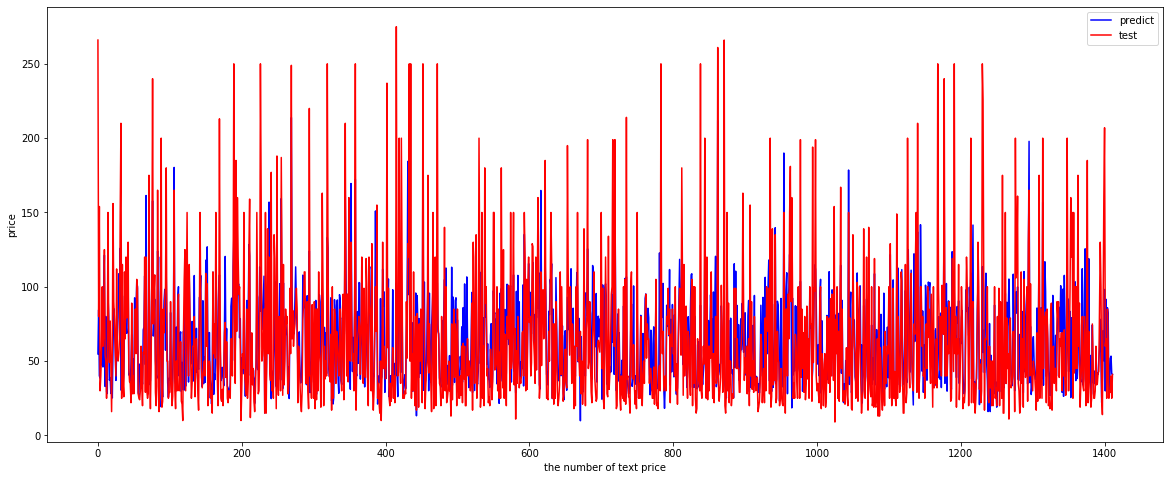

Train MAE: 21.61215788195161
Train RMAE: 4.648887811289019
Test MAE: 21.944813701342742
Test RMAE: 4.684529186731869


In [46]:
# 转换数据  特征不包括price   is_popular ； 标注就是data的价格列

X = data.drop(['price','is_popular'],axis=1)
y = data['price']

# 划分训练集和测试集，下边这个参数是 30%的数据作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 循环多元回归模型
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
# print(model)

print("linereg的theta = ",linreg.coef_)
print()
print("linreg的截距项 = "  ,linreg.intercept_)
# 预测，分别预测了训练集的价格预测，和测试集合的价格预测，这也有助于检测数据是否过拟合。
y_train_hat = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
# 上行，y_pred就是用训练好的模型预测X test特征下价格y_pred

# 使用图形来对比预测数据与实际数据之间的关系，plot的两行分别代表一个是真正的价格，一个是预测出来的（ytest 和ypred）
plt.figure(figsize=(20,8))
plt.plot(range(len(y_pred)), y_pred, 'b', label='predict')
plt.plot(range(len(y_pred)), y_test, 'r', label='test')
# plt.plot(range(len(y_pred)),y_pred-y_test, 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of text price')
plt.ylabel('price')
plt.show()

# 模型验证

print("Train MAE:",sklearn.metrics.mean_absolute_error(y_train,y_train_hat))
print("Train RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_train,y_train_hat)))
print("Test MAE:",sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Test RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_test,y_pred)))

上图是20%的xtest数据下预测的y——pred和真正的ytest数据折线图，可以看到，约1400个数据点堆叠在一起，看不出差别，但在这个多元线性回归模型下，RAME约为4.8.

因此考虑将图像横坐标再集中观察一些，比如去300-400个数据点的位置，代码如下，图像如下

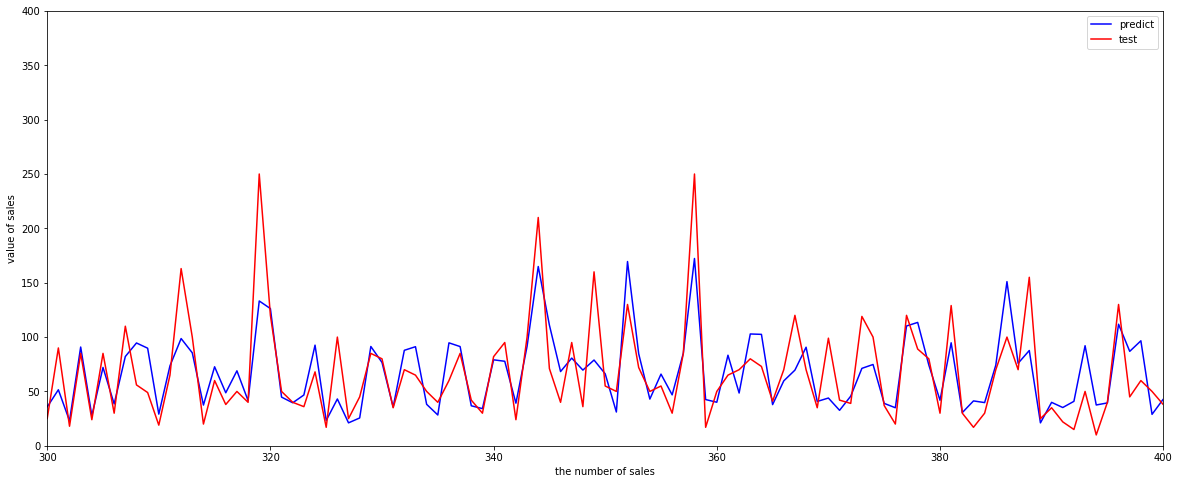

In [47]:
# 局部放大
plt.figure(figsize=(20,8))
plt.plot(range(len(y_pred)), y_pred, 'b', label='predict')
plt.plot(range(len(y_pred)), y_test, 'r', label='test')
# plt.plot(range(len(y_pred)),y_pred-y_test, 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of sales')
plt.ylabel('value of sales')
plt.xlim(300,400)   #这行加的
plt.ylim(0,400)
plt.show()


可以看到的是，预测价格和测试价格稳定的缠绕在一起，大部分预测结果是准确的

### 决策树模型
决策树模型属于依据特征数据来进行投票的算法，

在代码前几行依然是引入必要的计算包， 代码中间部分同样是切割数据集，在最后打印了测试集和训练集的MAE  和RMAE


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_pred = clf.predict(X_test)

print("Train MAE:",sklearn.metrics.mean_absolute_error(y_train,y_train_hat))
print("Train RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_train,y_train_hat)))
print("Test MAE:",sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Test RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_test,y_pred)))


Train MAE: 21.95360378526956
Train RMAE: 4.685467296361118
Test MAE: 21.905419766206165
Test RMAE: 4.680322613475076


可以看到在test数据集上，test rmae约为4.8.稍稍高于多元线性回归的4.7 ； 从本质上来说没什么太大区别，作图看看

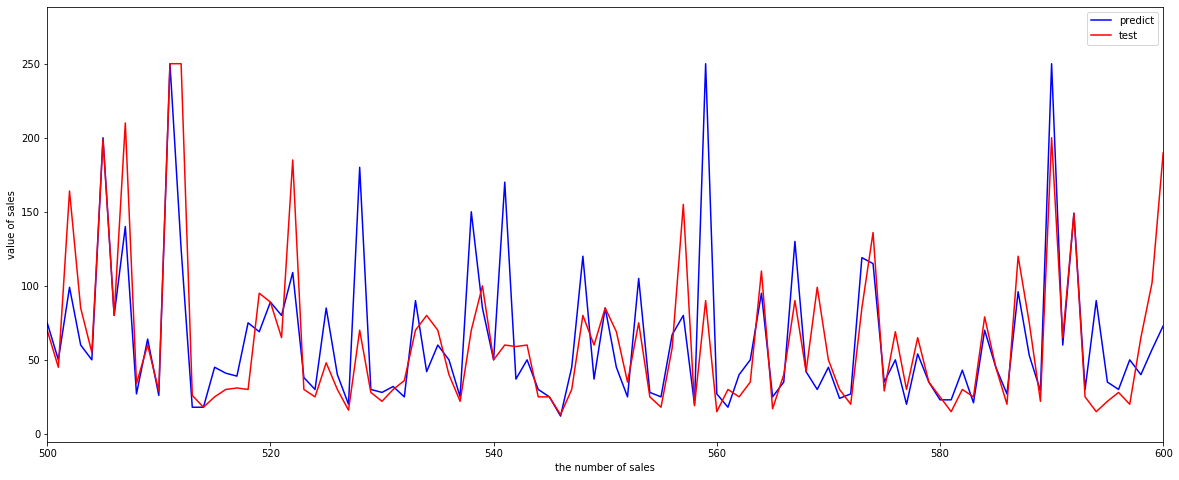

In [49]:
# 局部放大
plt.figure(figsize=(20,8))
plt.plot(range(len(y_pred)), y_pred, 'b', label='predict')
plt.plot(range(len(y_pred)), y_test, 'r', label='test')
# plt.plot(range(len(y_pred)),y_pred-y_test, 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of sales')
plt.ylabel('value of sales')
plt.xlim(500,600)
plt.show()

可以看到预测价格与实际价格大部分仅仅贴靠在缠绕在交m织在一起，模型是有用的。

## 是否受欢迎预测

刚刚价格如果说因为各个变量的不同，导致的价格结果是连续的话，那么是否受欢迎属于分类问题，首先考虑的就是分类模型， 分类模型中，首先考虑KNN模型。



In [50]:

data = pd.read_csv('for_model.csv')
data=data.set_index('Unnamed: 0')
colist=[column for column in data]
colist

['room_type',
 'price',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'review_scores_rating',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_entire_homes',
 'is_popular',
 'distance',
 'host_verifieds',
 'review_scores_mean']

In [51]:

X = data.drop(['is_popular'],axis=1)
y=data['is_popular']



### KNN
关于knn，模型网上有很多解释， 具体可以查一查。但简而言之就是一句话：我周边的属于什么，我就属于什么。

切割数据集合后，第13行是训练模型，

最后大打印的是损失和得分

In [53]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import sklearn
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

n_class = len(set(y_train))  
y_one_hot = label_binarize(y_test, np.arange(n_class))  


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)    # 自动完成train步骤
# 验证模型
y_train_hat = knn.predict(X_train)
y_hat = knn.predict(X_test)                                    # 形式一：原始值（0或1或2）
y_score_pro = knn.predict_proba(X_test)                          # 形式二：各类概率值
y_score_one_hot = label_binarize(y_hat, np.arange(n_class)) # 形式三：one-hot值


print('KNN聚类算法结果:')
print("Train MAE:",sklearn.metrics.mean_absolute_error(y_train,y_train_hat))
print("Train RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_train,y_train_hat)))
print("Test MAE:",sklearn.metrics.mean_absolute_error(y_test,y_hat))
print("Test RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_test,y_hat)))

print('accuracy:{}'.format(accuracy_score(y_test, y_hat)))
print('precision:{}'.format(precision_score(y_test, y_hat,average='micro')))
print('recall:{}'.format(recall_score(y_test, y_hat,average='micro')))
print('f1-score:{}'.format(f1_score(y_test, y_hat,average='micro')))


KNN聚类算法结果:
Train MAE: 0.1674196120116928
Train RMAE: 0.4091694172487636
Test MAE: 0.25292242295430395
Test RMAE: 0.5029139319548663
accuracy:0.7470775770456961
precision:0.7470775770456961
recall:0.7470775770456961
f1-score:0.7470775770456961


这个图的相关介绍，可以看这篇帖子
https://blog.csdn.net/akadiao/article/details/78788864

总之就是向上围成的面积越大越好

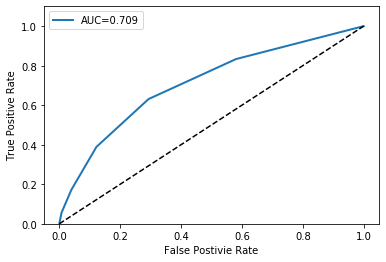

In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
 
# AUC值
auc = roc_auc_score(y_one_hot, y_score_pro[:,1],average='micro')
 
# 画ROC曲线
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro[:,1].ravel())   # ravel()表示平铺开来
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')

plt.xlim(-0.05,1.05)
plt.legend()
plt.show()
auc = roc_auc_score(y_one_hot, y_score_pro[:,1],average='micro')

#### 调整邻居个数

In [55]:
# K折交叉验证模块
from sklearn.model_selection import cross_val_score

# 使用K折交叉验证模块 ,这个knn 和之前的不同
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)    # 自动完成train步骤

n_class = len(set(y_train))  
y_one_hot = label_binarize(y_test, np.arange(n_class))  




# 验证模型
y_train_hat = knn.predict(X_train)
y_hat = knn.predict(X_test)                                    # 形式一：原始值（0或1或2）
y_score_pro = knn.predict_proba(X_test)                          # 形式二：各类概率值
y_score_one_hot = label_binarize(y_hat, np.arange(n_class)) # 形式三：one-hot值


print('RandomForestRegressor evaluating result:')
print("Train MAE:",sklearn.metrics.mean_absolute_error(y_train,y_train_hat))
print("Train RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_train,y_train_hat)))
print("Test MAE:",sklearn.metrics.mean_absolute_error(y_test,y_hat))
print("Test RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_test,y_hat)))

print('accuracy:{}'.format(accuracy_score(y_test, y_hat)))
print('precision:{}'.format(precision_score(y_test, y_hat,average='micro')))
print('recall:{}'.format(recall_score(y_test, y_hat,average='micro')))
print('f1-score:{}'.format(f1_score(y_test, y_hat,average='micro')))

RandomForestRegressor evaluating result:
Train MAE: 0.23757640180706882
Train RMAE: 0.48741809753749277
Test MAE: 0.24760892667375134
Test RMAE: 0.4976031819369239
accuracy:0.7523910733262487
precision:0.7523910733262487
recall:0.7523910733262487
f1-score:0.7523910733262488


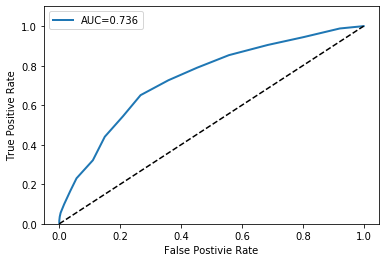

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
 
# AUC值
auc = roc_auc_score(y_one_hot, y_score_pro[:,1],average='micro')
 
# 画ROC曲线
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro[:,1].ravel())   # ravel()表示平铺开来
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')

plt.xlim(-0.05,1.05)
plt.legend()
plt.show()
auc = roc_auc_score(y_one_hot, y_score_pro[:,1],average='micro')

### 随机森林回归
算法解释：
随机森林回归相当于众多的决策树共同起作用
首先随机抽取特征生成决策树，这样的树可以是一颗，也可以是n颗，因为每一棵树是随机抽取的特征和标签，所以他们的计算权重都是有所差异的。
每一颗小树，得到一个指向房屋是否受欢迎的结果。
最后统计所有树的结果，投票决定最终的pred结果。

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler  # 预处理特征工程
import sklearn.metrics  #评价指标

In [62]:
# 分割数据及
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

目前是直接计算了1000棵树

In [63]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)


In [64]:
     

print('RandomForestRegressor evaluating result:')
print("Train MAE:",sklearn.metrics.mean_absolute_error(y_train,y_train_pred))
print("Train RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_train,y_train_pred)))
print("Test MAE:",sklearn.metrics.mean_absolute_error(y_test,y_test_pred))
print("Test RMAE:",np.sqrt(sklearn.metrics.mean_absolute_error(y_test,y_test_pred)))

print('accuracy:{}'.format(accuracy_score(y_test, y_hat)))
print('precision:{}'.format(precision_score(y_test, y_hat,average='micro')))
print('recall:{}'.format(recall_score(y_test, y_hat,average='micro')))
print('f1-score:{}'.format(f1_score(y_test, y_hat,average='micro')))

RandomForestRegressor evaluating result:
Train MAE: 0.08387722561785808
Train RMAE: 0.28961565154158725
Test MAE: 0.2330297555791711
Test RMAE: 0.48273155643604976
accuracy:0.6822529224229543
precision:0.6822529224229543
recall:0.6822529224229543
f1-score:0.6822529224229543


通过目前的算法可以看到，是否受欢迎程度这个结果准确度为60%--75%

In [91]:
from sklearn.metrics import classification_report

ans = classification_report(y_test,y_hat,digits=5)
print(ans)

              precision    recall  f1-score   support

           0    0.72512   0.90133   0.80368       679
           1    0.30928   0.11450   0.16713       262

    accuracy                        0.68225       941
   macro avg    0.51720   0.50791   0.48540       941
weighted avg    0.60934   0.68225   0.62645       941



上边这个表格，大概这么看
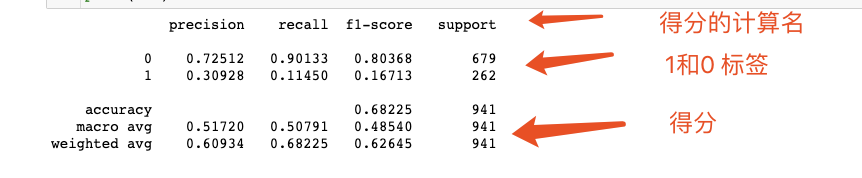